In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

sns.set()

In [2]:
df=pd.read_csv('E:/Class Notes/jillu mam/ML/Exam/Logistic Regression Question/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot: xlabel='Semester', ylabel='count'>

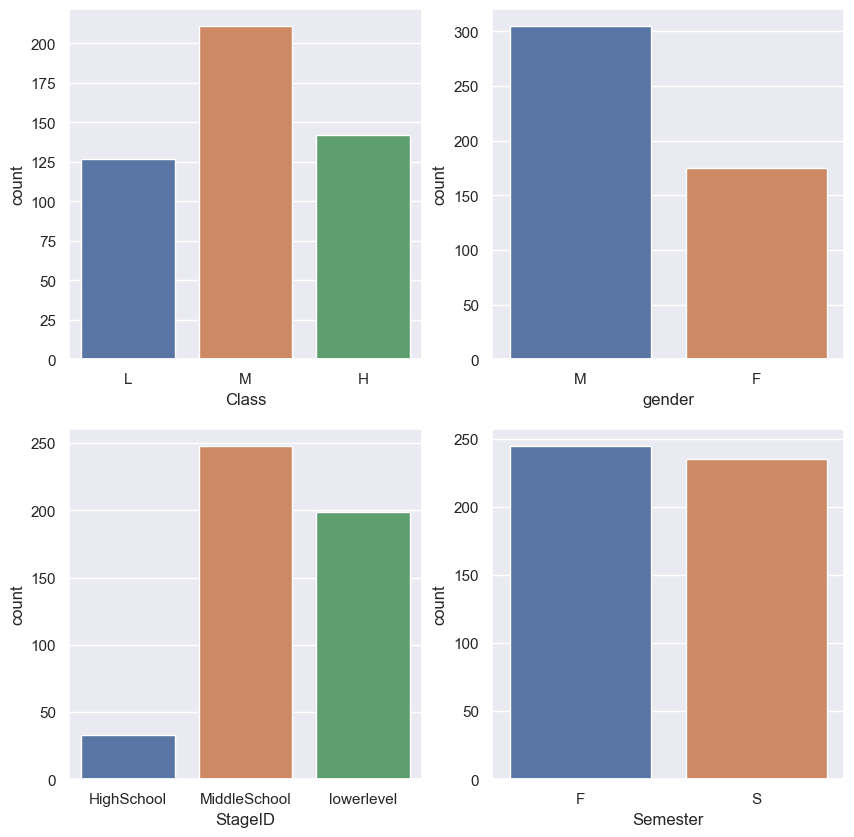

In [37]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(x='Class', y='count', data=df.groupby('Class').size().reset_index(name='count'), ax=axarr[0, 0], order=['L', 'M', 'H'])
sns.barplot(x='gender', y='count', data=df.groupby('gender').size().reset_index(name='count'), ax=axarr[0, 1], order=['M', 'F'])
sns.barplot(x='StageID', y='count', data=df.groupby('StageID').size().reset_index(name='count'), ax=axarr[1, 0])
sns.barplot(x='Semester', y='count', data=df.groupby('Semester').size().reset_index(name='count'), ax=axarr[1, 1])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Egypt'),
  Text(1, 0, 'Iran'),
  Text(2, 0, 'Iraq'),
  Text(3, 0, 'Jordan'),
  Text(4, 0, 'KW'),
  Text(5, 0, 'Lybia'),
  Text(6, 0, 'Morocco'),
  Text(7, 0, 'Palestine'),
  Text(8, 0, 'SaudiArabia'),
  Text(9, 0, 'Syria'),
  Text(10, 0, 'Tunis'),
  Text(11, 0, 'USA'),
  Text(12, 0, 'lebanon'),
  Text(13, 0, 'venzuela')])

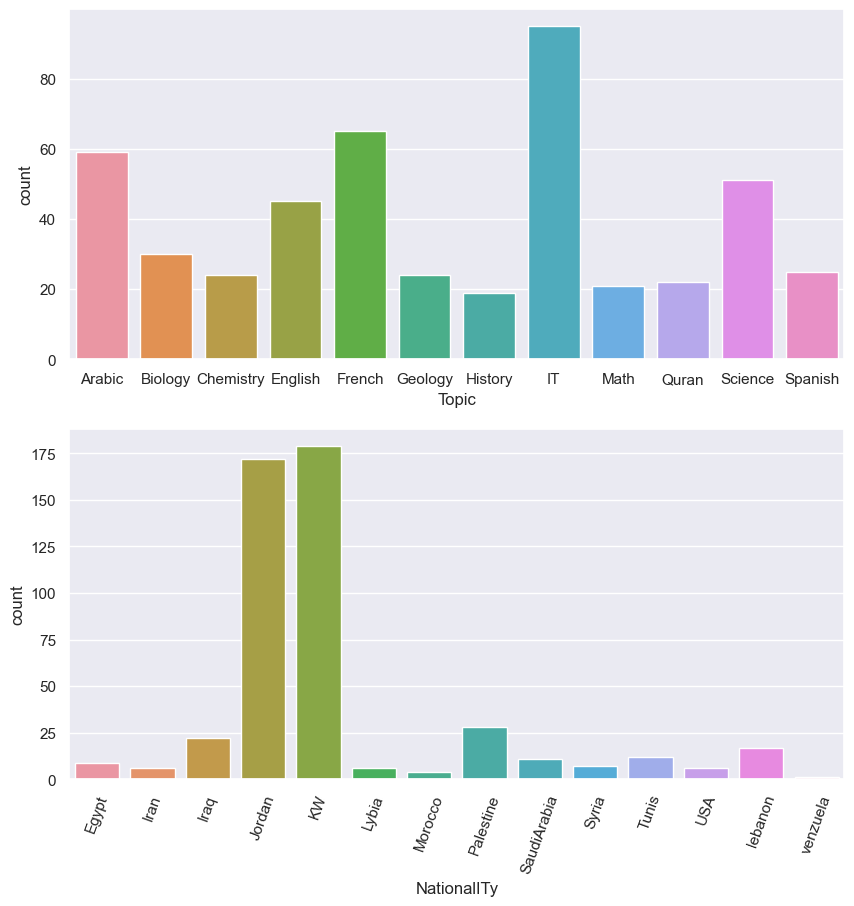

In [46]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='Topic', y='count', data=df.groupby('Topic').size().reset_index(name='count'), ax=axis1)
sns.barplot(x='NationalITy', y='count', data=df.groupby('NationalITy').size().reset_index(name='count'), ax=axis2)
plt.xticks(rotation=70)

Ans : Most of these countries are in the middle east(Islamic states), perhaps this explains the gender disparity

#### 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot: xlabel='gender', ylabel='count'>

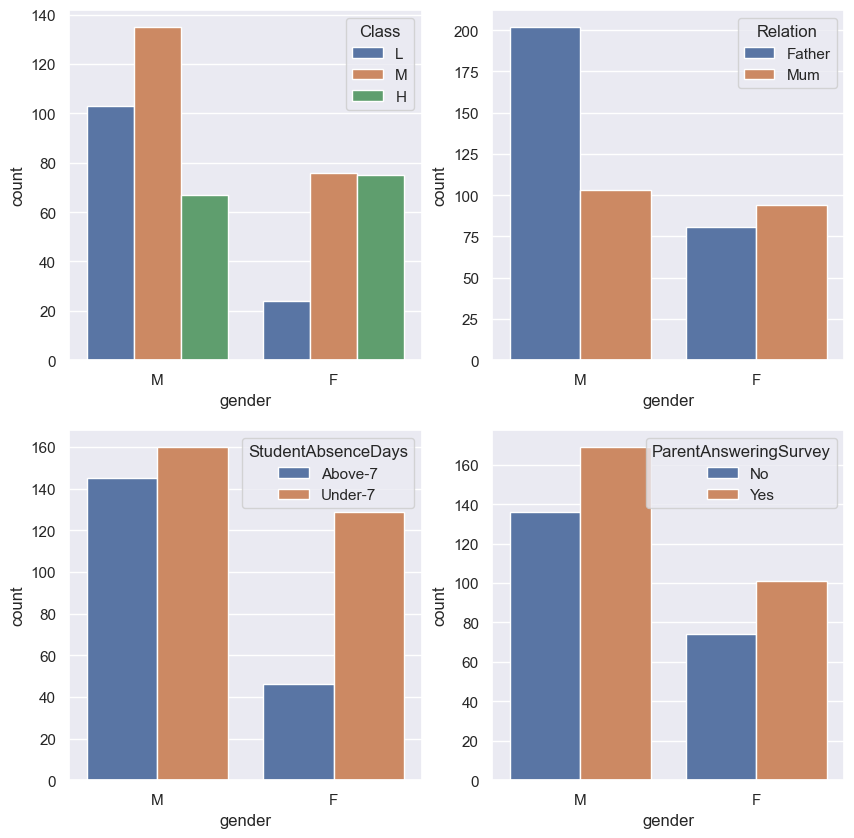

In [39]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(x='gender', y='count', hue='Class', data=df.groupby(['gender', 'Class']).size().reset_index(name='count'), ax=axarr[0, 0], order=['M', 'F'], hue_order=['L', 'M', 'H'])
sns.barplot(x='gender', y='count', hue='Relation', data=df.groupby(['gender', 'Relation']).size().reset_index(name='count'), ax=axarr[0, 1], order=['M', 'F'])
sns.barplot(x='gender', y='count', hue='StudentAbsenceDays', data=df.groupby(['gender', 'StudentAbsenceDays']).size().reset_index(name='count'), ax=axarr[1, 0], order=['M', 'F'])
sns.barplot(x='gender', y='count', hue='ParentAnsweringSurvey', data=df.groupby(['gender', 'ParentAnsweringSurvey']).size().reset_index(name='count'), ax=axarr[1, 1], order=['M', 'F'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Egypt'),
  Text(1, 0, 'Iran'),
  Text(2, 0, 'Iraq'),
  Text(3, 0, 'Jordan'),
  Text(4, 0, 'KW'),
  Text(5, 0, 'Lybia'),
  Text(6, 0, 'Morocco'),
  Text(7, 0, 'Palestine'),
  Text(8, 0, 'SaudiArabia'),
  Text(9, 0, 'Syria'),
  Text(10, 0, 'Tunis'),
  Text(11, 0, 'USA'),
  Text(12, 0, 'lebanon'),
  Text(13, 0, 'venzuela')])

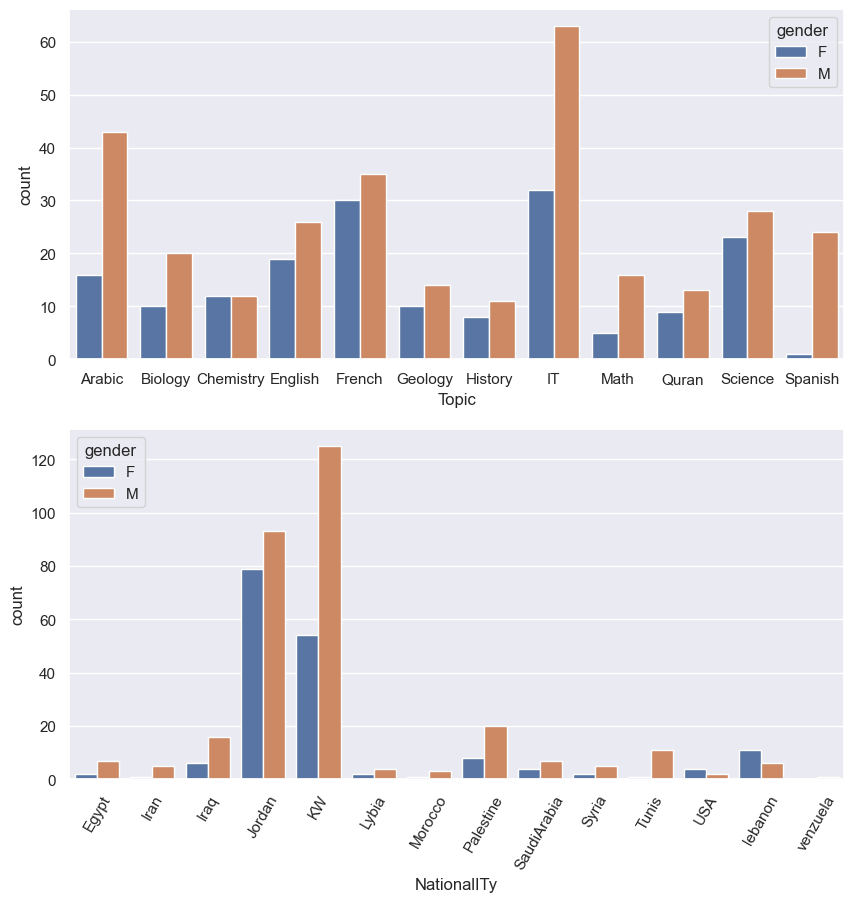

In [47]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='Topic', y='count', hue='gender', data=df.groupby(['Topic', 'gender']).size().reset_index(name='count'), ax=axis1)
sns.barplot(x='NationalITy', y='count', hue='gender', data=df.groupby(['NationalITy', 'gender']).size().reset_index(name='count'), ax=axis2)
plt.xticks(rotation=60)


### Answer
* The academic performance of girls appears to be better than that of boys.
* Among girls, mothers appear to show a higher interest in their education than fathers.
* Girls had a significantly better attendance record compared to boys.
* There does not appear to be any significant gender bias in subject/topic choices that would explain the difference in academic performance between boys and girls.
* The gender disparity in academic performance exists at the country level, which could be attributed to the way the sample was selected.

### 3. Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot: xlabel='Class', ylabel='Discussion'>

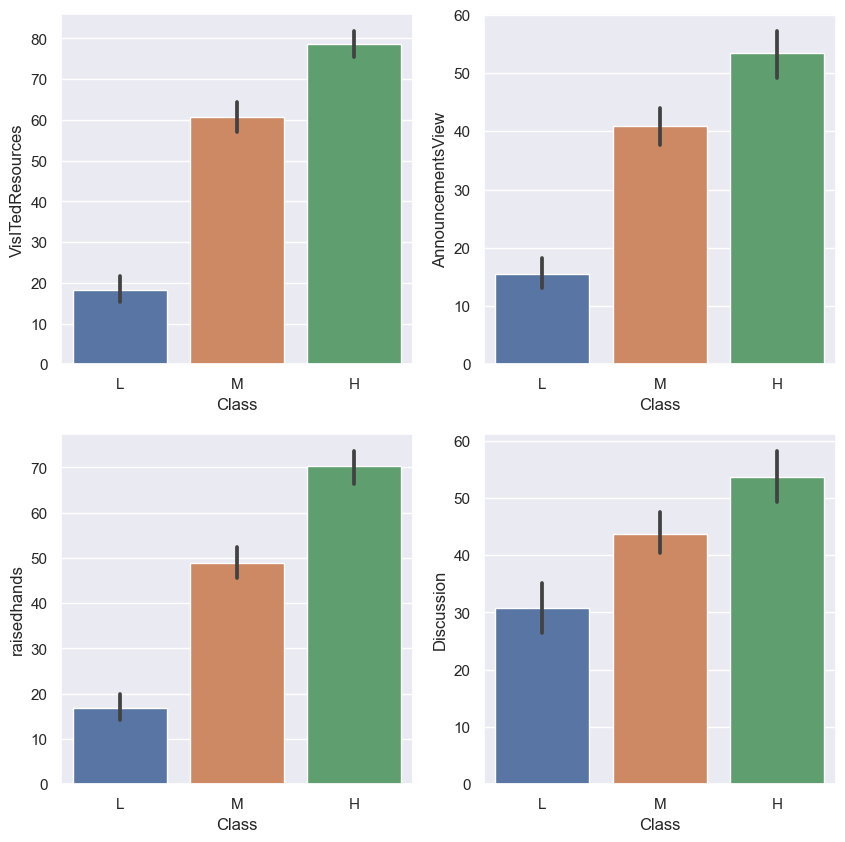

In [9]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot: xlabel='Semester', ylabel='AnnouncementsView'>

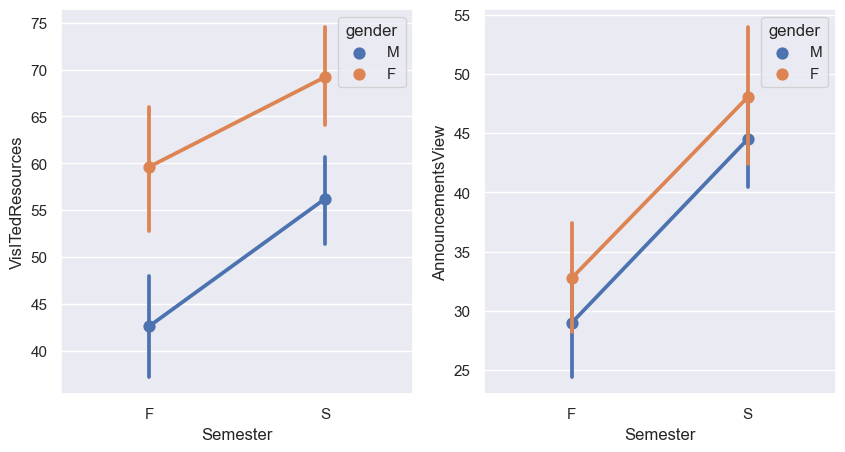

In [10]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

### Answer
* As anticipated, students who were more active (with higher numbers of Discussion contributions, raised hands, Announcement Views, and Raised Hands) achieved better academic performance.

* Additionally, during the second semester, students seemed to be more attentive to visiting resources and viewing announcements, possibly due to the need to improve their final grades before the academic year ended.


In [12]:
ave_raisedhands = sum(df['raisedhands'])/len(df['raisedhands'])
ave_VisITedResources = sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_AnnouncementsView = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])
Un_success = df.loc[(df['raisedhands'] >= ave_raisedhands) & (df['VisITedResources']>=ave_VisITedResources) & (df['AnnouncementsView']>=ave_AnnouncementsView)  & (df['Class'] == 'L')]

In [14]:
Un_success

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


#### 4. From the above result, what are the factors that leads to get low grades of the students?

Note : Above two students have features ('raisedhands' , 'VisITedResources' , 'AnnouncementsView' ) greater than average

In [17]:
df['numeric_class'] = [1 if df.loc[i,'Class'] == 'L' else 2 if df.loc[i,'Class'] == 'M' else 3 for i in range(len(df))]

In [18]:
grade_male_ave = sum(df[df.gender == 'M'].numeric_class)/float(len(df[df.gender == 'M']))
grade_female_ave = sum(df[df.gender == 'F'].numeric_class)/float(len(df[df.gender == 'F']))


* Gender comparison cannot completely explain low level grades


Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

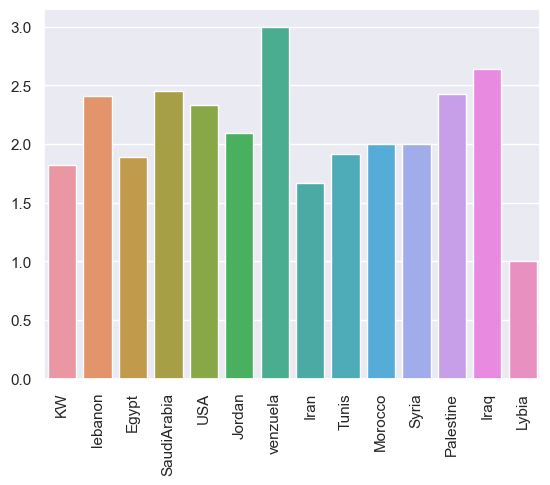

In [19]:
# Now lets look at nationality
nation = df.NationalITy.unique()
nation_grades_ave = [sum(df[df.NationalITy == i].numeric_class)/float(len(df[df.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(df[df.NationalITy == 'Jordan'].numeric_class)/float(len(df[df.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

* As it can be seen in bar plot Jordan is seventh country with average 2.09 so 'Jordan' has positive impact on these two students actually

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

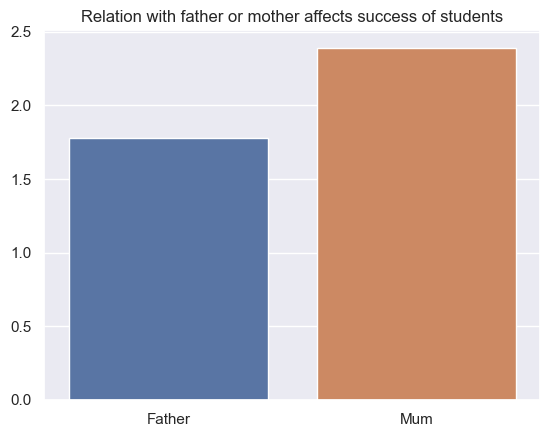

In [20]:
# Lets look at relation with family members
relation = df.Relation.unique()
relation_grade_ave = [sum(df[df.Relation == i].numeric_class)/float(len(df[df.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

* Having relation with mum has positive effect on these students

Text(0.5, 1.0, 'Discussion group participation')

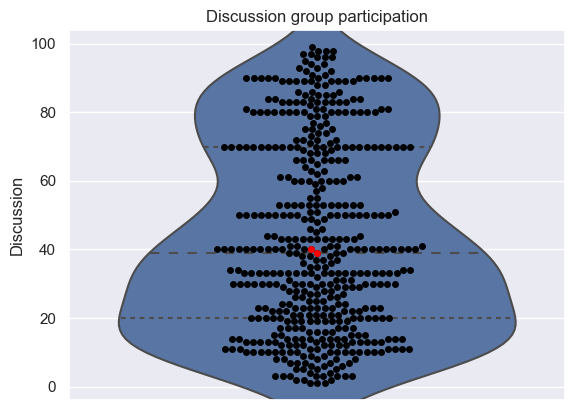

In [21]:
#Lets look at how many times the student participate on discussion groups
discussion = df.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='black')
ax = sns.swarmplot(y = Un_success.Discussion, color='red')
plt.title('Discussion group participation')


Text(0.5, 1.0, 'Absence effect on success')

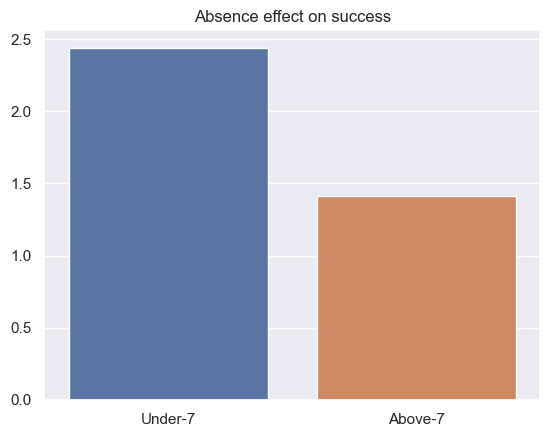

In [48]:
# Now lastly lets look at
absence_day = df.StudentAbsenceDays.unique()
absense_day_ave = [sum(df[df.StudentAbsenceDays == i].numeric_class)/float(len(df[df.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')


### Answer : 
* These two students' discussion participation (which is below the average of 43) might be a significant factor behind their low grades.

* Furthermore, their attendance record indicates more than seven absences, which also contributed to their poor academic performance.

### 5. Build classification model and present it's classification report ?

In [23]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [24]:
data1 = df.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [25]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [26]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)


StandardScaler()

In [28]:
X = scaler.fit_transform(Features)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=40)


In [50]:
Log= LogisticRegression()
Log.fit(X_train,y_train)

LogisticRegression()

In [51]:
Prediction = Log.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [52]:
Prediction

array([1, 2, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 3, 2, 2,
       3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 3, 2, 2, 3,
       1, 2, 1, 3, 3, 2, 2, 3, 2, 1, 3, 1, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2,
       3, 1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 2, 2, 3, 1, 1, 3, 3, 2, 1, 2, 1,
       2, 3, 2, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 3, 2, 2, 2, 1,
       1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

In [53]:
Score

0.7361111111111112

In [54]:
print(Report)

              precision    recall  f1-score   support

           1       0.84      0.84      0.84        38
           2       0.80      0.63      0.71        71
           3       0.58      0.83      0.68        35

    accuracy                           0.74       144
   macro avg       0.74      0.77      0.74       144
weighted avg       0.76      0.74      0.74       144

